<a href="https://colab.research.google.com/github/devluz2023/serie_temporal/blob/main/serie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alucar - Analisando as vendas

In [6]:
!git clone https://github.com/devluz2023/serie_temporal.git

fatal: destination path 'serie_temporal' already exists and is not an empty directory.


In [7]:
import pandas as pd

In [8]:
pd.read_csv('serie_temporal/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [9]:
alucar = pd.read_csv('serie_temporal/alucar.csv')

In [10]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [11]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [12]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [13]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [14]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [15]:
print(sns.__version__)

0.9.0


<Axes: xlabel='mes', ylabel='vendas'>

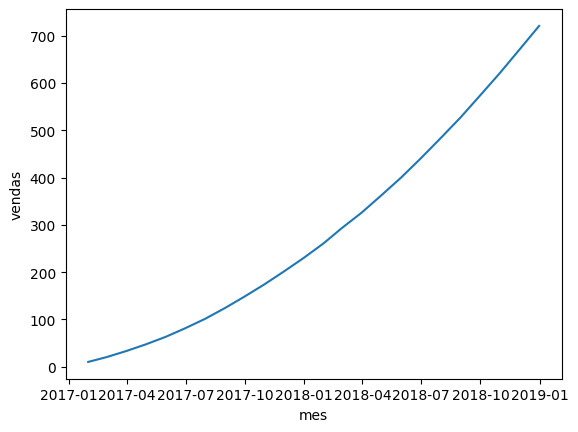

In [16]:
sns.lineplot(x='mes', y='vendas', data=alucar)

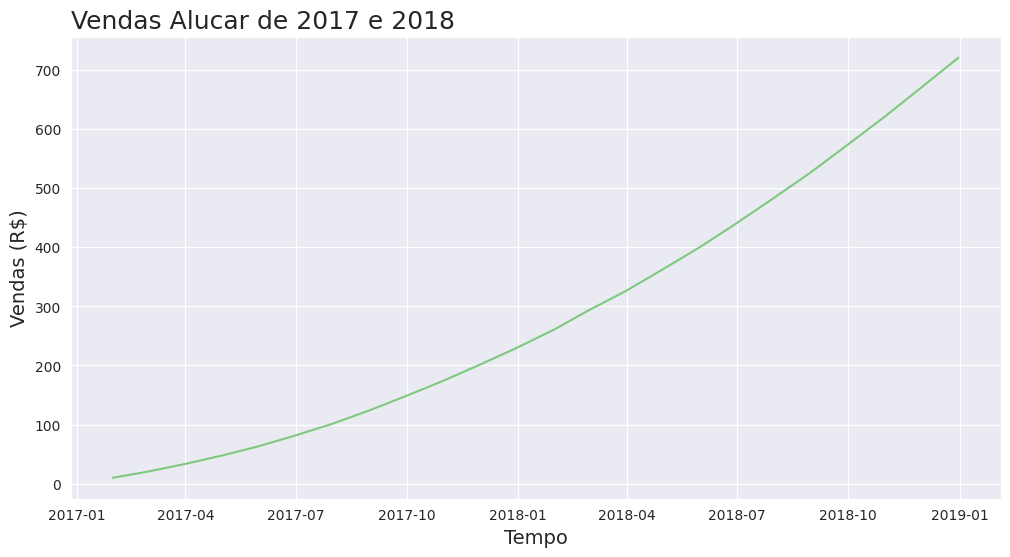

In [17]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [18]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


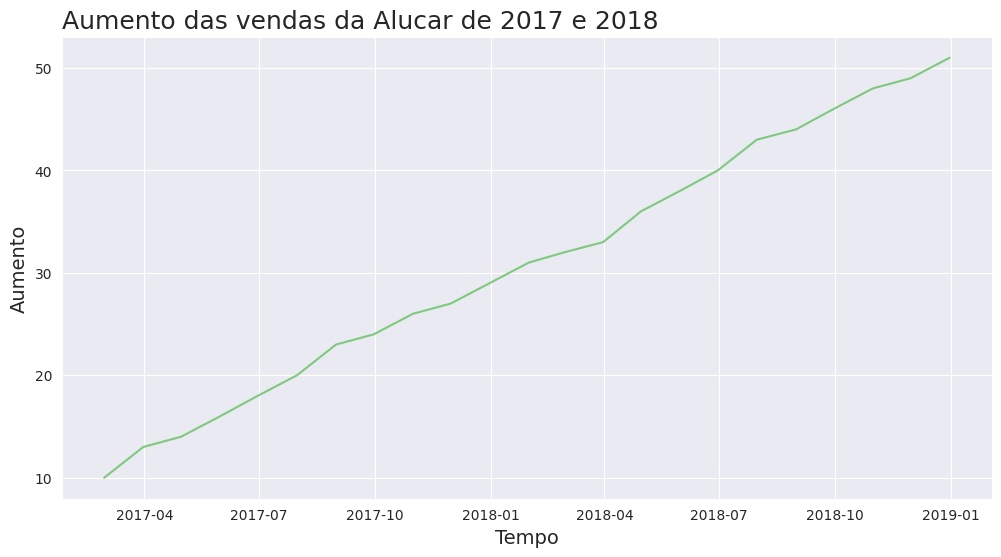

In [19]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [20]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

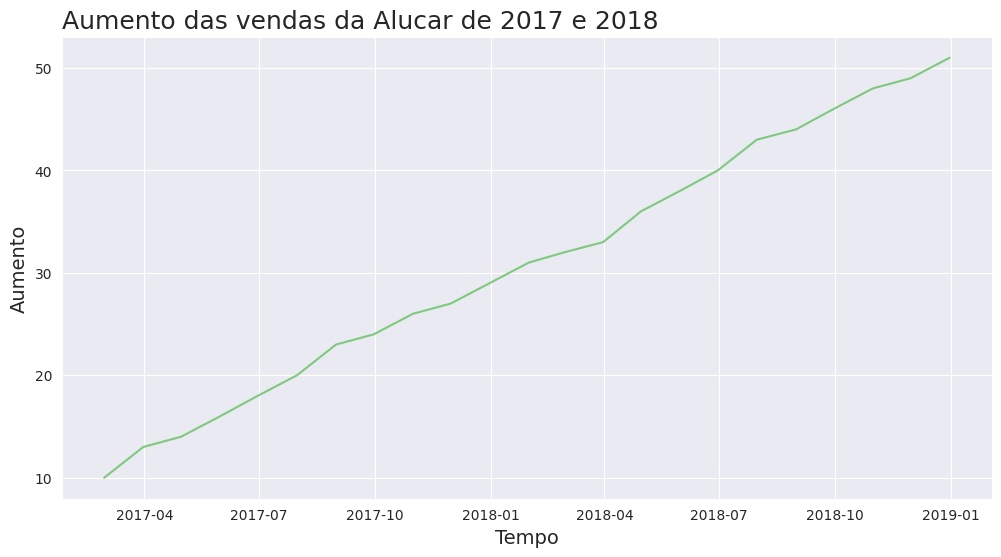

In [21]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento',
      'mes', 'aumento', alucar)

In [22]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


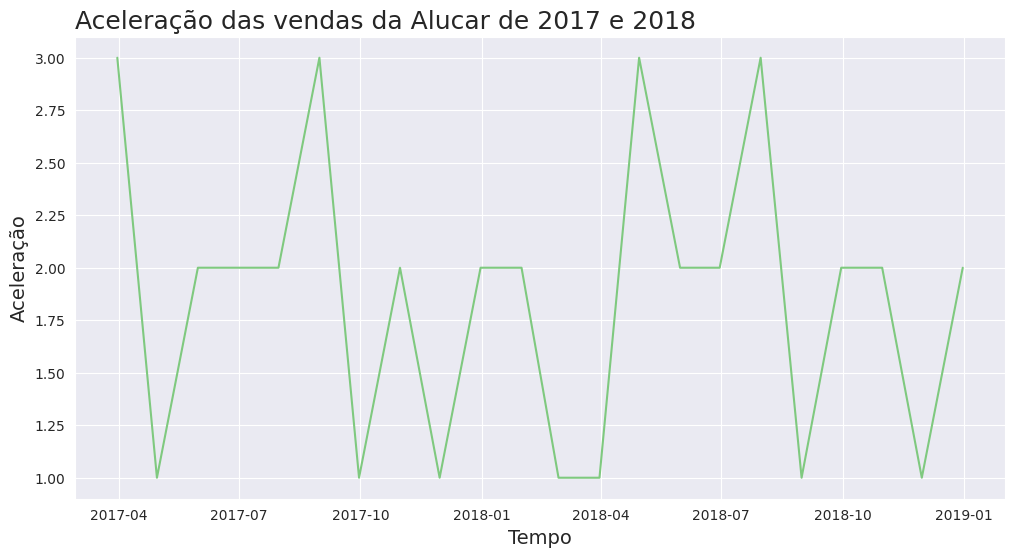

In [23]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração',
      'mes', 'aceleracao', alucar)

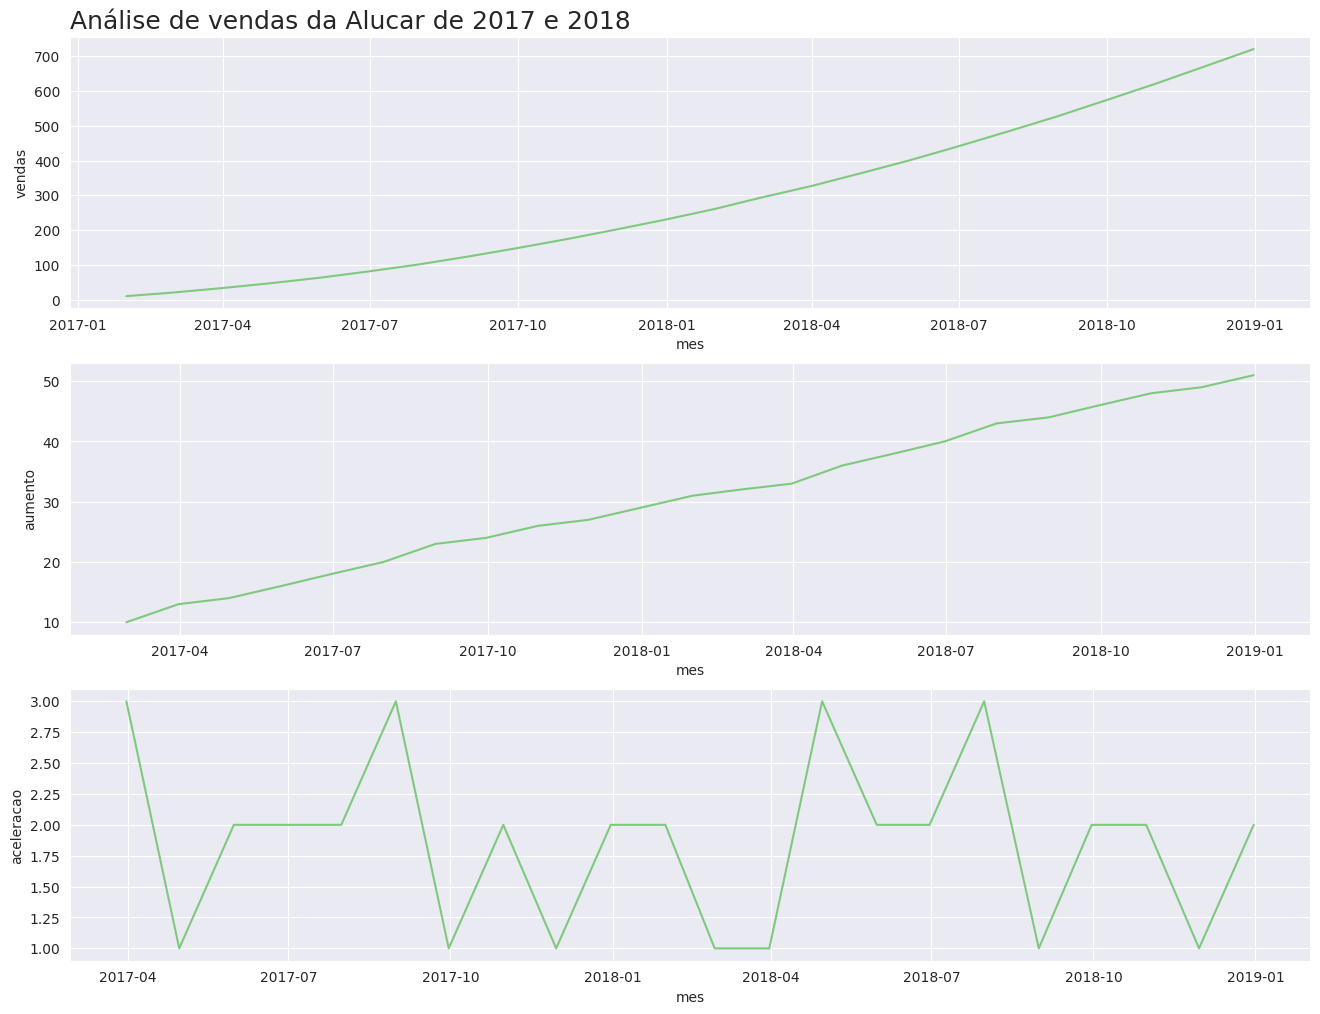

In [24]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18,loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [25]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18,loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

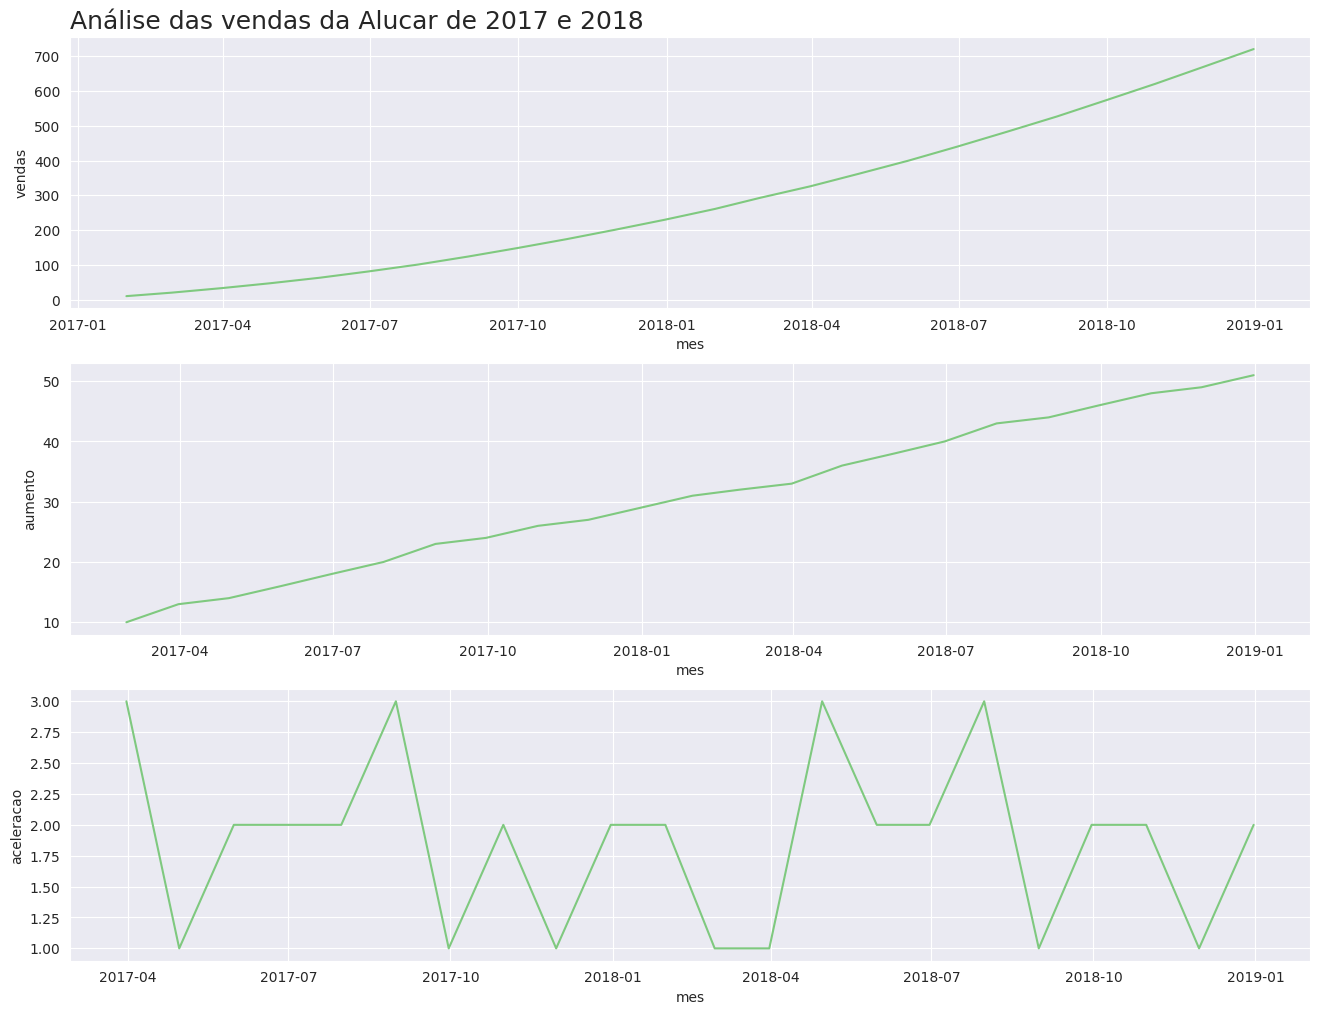

In [26]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
               alucar, 'Análise das vendas da Alucar de 2017 e 2018')

In [27]:
from pandas.plotting import autocorrelation_plot

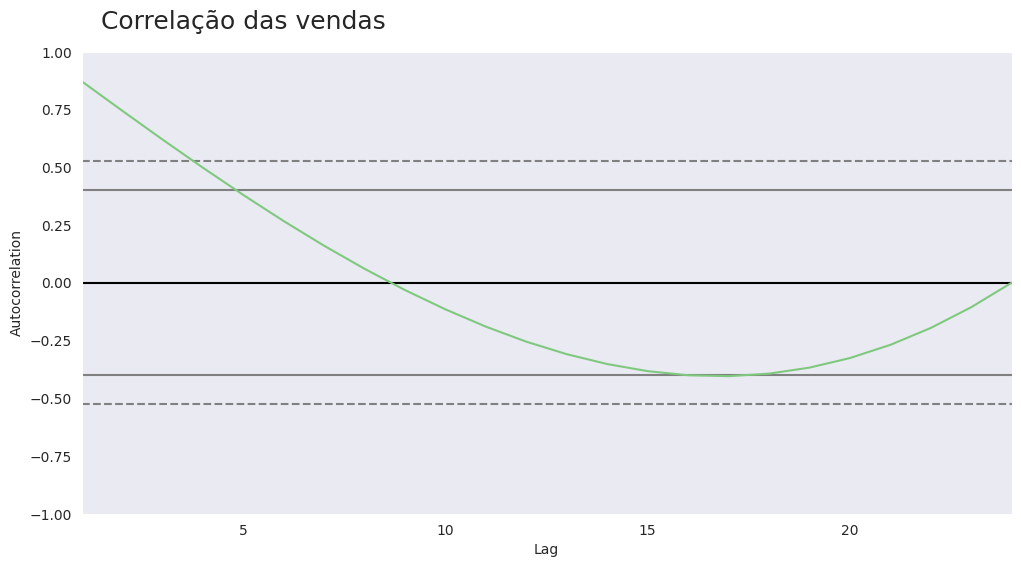

In [28]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

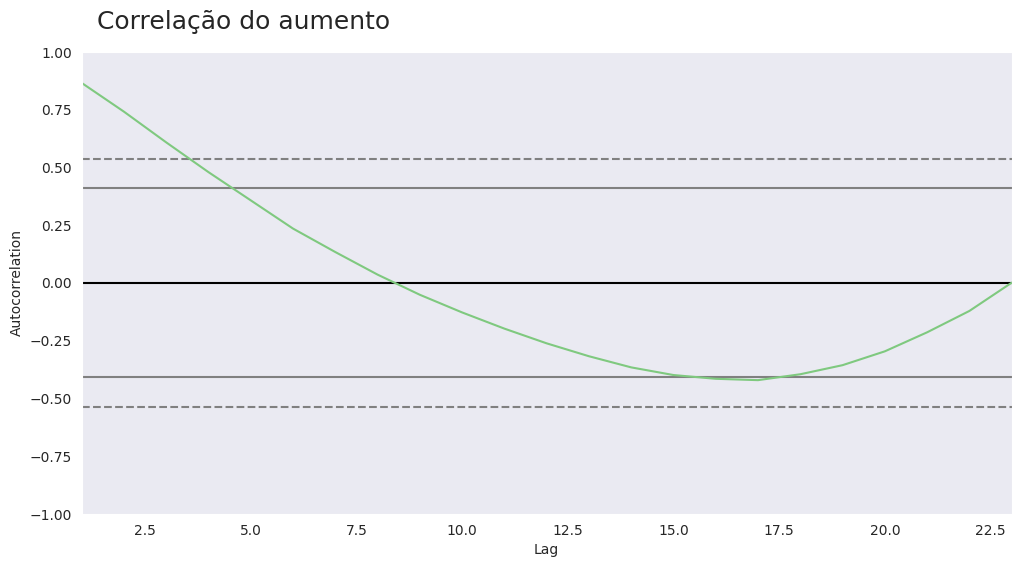

In [29]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

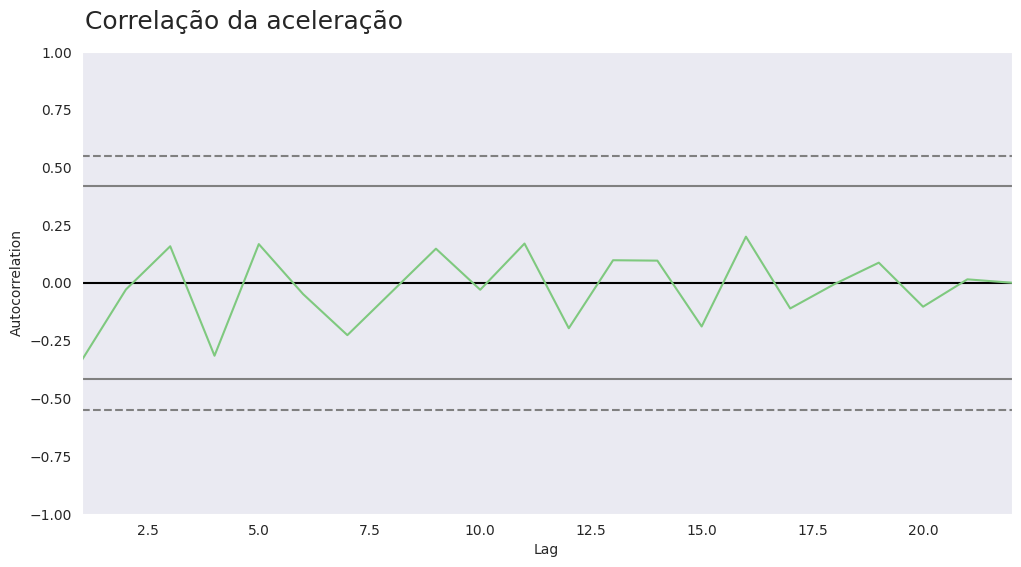

In [30]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [32]:
assinantes = pd.read_csv('serie_temporal/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
assinantes.dtypes

In [ ]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

In [ ]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

In [ ]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao',
                assinantes, 'Análise de assinantes da newsletter')

# Chocolura - Analisando as vendas

In [ ]:
chocolura = pd.read_csv('serie_temporal/chocolura.csv')
chocolura.head()

In [ ]:
chocolura.dtypes

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

In [ ]:
print('Quantidade de linhas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

In [ ]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

# Chocolura - Vendas diárias (Outubro e Novembro)

In [ ]:
vendas_por_dia = pd.read_csv('serie_temporal/vendas_por_dia.csv')
vendas_por_dia.head()

In [ ]:
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

In [ ]:
vendas_por_dia.dtypes

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
               vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

**Analisando a sazonalidade**

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.weekday_name

In [ ]:
vendas_por_dia.head(7)

In [ ]:
vendas_por_dia['dia_da_semana'].unique()

In [ ]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terca', 'Wednesday':'Quarta',
                   'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado',
       'Sunday':'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

In [ ]:
vendas_por_dia.head(14)

**Agrupando os dias**

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

In [ ]:
vendas_agrupadas

**Correlação das vendas diárias**

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de vendas

In [ ]:
cafelura = pd.read_csv('serie_temporal/cafelura.csv')
cafelura.head()

In [ ]:
cafelura.dtypes

In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

In [ ]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

In [ ]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas',
      'mes', 'vendas', cafelura)

In [ ]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

In [ ]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

In [ ]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

In [ ]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018',
      'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas',
      cafelura)

In [ ]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

# Statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3,)
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado,
               'Exemplo de Statsmodels')

# Alucel - Análise de vendas

In [ ]:
alucel = pd.read_csv('serie_temporal/alucel.csv')
alucel.head()

In [ ]:
alucel.dtypes

In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

In [ ]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

In [ ]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

**Média móvel**

In [ ]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [ ]:
alucel.head(7)

In [ ]:
plotar('Análise de vendas com média móvel de 7 dias',
      'Tempo', 'Media móvel', 'dia', 'media_movel', alucel)

In [ ]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

In [ ]:
plotar('Análise de vendas com média móvel de 21 dias',
      'Tempo', 'Media móvel', 'dia', 'media_movel_21', alucel)

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21',
               alucel, 'Comparando as vendas com médias móveis')